In [1]:
import json
from pathlib import Path

In [2]:
IMAGES_PATH = Path("data/images/")
ANNOTATIONS_PATH = Path("annotations.json")

In [3]:
with open(ANNOTATIONS_PATH, "r", encoding="utf-8") as annotations_file:
    annotations = json.load(annotations_file)

In [4]:
annotations[0]["img"]

'/data/upload/20/f6d17e19-1779.jpg'

In [5]:
annotations[0]["kp-1"]

[{'x': 11.785095320623917,
  'y': 28.18590704647676,
  'width': 0.3466204506065858,
  'keypointlabels': ['1'],
  'original_width': 768,
  'original_height': 888},
 {'x': 47.14038128249567,
  'y': 25.337331334332834,
  'width': 0.3466204506065858,
  'keypointlabels': ['2'],
  'original_width': 768,
  'original_height': 888},
 {'x': 83.88214904679376,
  'y': 31.334332833583208,
  'width': 0.3466204506065858,
  'keypointlabels': ['3'],
  'original_width': 768,
  'original_height': 888},
 {'x': 54.766031195840554,
  'y': 32.23388305847077,
  'width': 0.3466204506065858,
  'keypointlabels': ['4'],
  'original_width': 768,
  'original_height': 888},
 {'x': 12.305025996533793,
  'y': 51.12443778110944,
  'width': 0.3466204506065858,
  'keypointlabels': ['5'],
  'original_width': 768,
  'original_height': 888},
 {'x': 46.967071057192385,
  'y': 54.27286356821589,
  'width': 0.3466204506065858,
  'keypointlabels': ['6'],
  'original_width': 768,
  'original_height': 888},
 {'x': 83.362218370883

In [6]:
import re

In [15]:
annotations = []

In [ ]:
from PIL import Image

In [ ]:
IMAGE_SIZE = (256, 256)

In [ ]:
width, height = IMAGE_SIZE

In [ ]:
n_channels = 3

In [ ]:
import numpy as np

In [ ]:
images = np.empty((0, n_channels, width, height))

In [ ]:
images.shape

(0, 3, 256, 256)

In [ ]:
import torch
import torchvision

In [ ]:
from typing import Callable, Iterable, Mapping, Sequence

In [ ]:
class RikaiCubeDataset(torch.utils.data.Dataset):
    def __init__(
            self, 
            annotations: Sequence[Mapping],
            data_path: Path,
    ) -> None:
        self.annotations = annotations
        self.data_path = data_path

    def __len__(self) -> int:
        return len(self.annotations)

    def __getitem__(self, idx: int) -> tuple[torch.Tensor, torch.Tensor]:
        # Read images from disks
        image_name = re.search(r"(\d+.jpg)", annotations[idx]["img"]).group()
        image_path = self.data_path / image_name
        image = torchvision.io.read_image(str(image_path))
        original_height, original_width = image.shape[1:]
        image = torchvision.transforms.Resize((256, 256))(image) / 255

        # Read keypoints from annotation file
        keypoints_annotation = annotations[idx]["kp-1"]
        keypoints_annotation.sort(key=lambda annotation: int(annotation["keypointlabels"][0]))
        keypoints = []
        for point_annotation in keypoints_annotation:
            x = int(256 * point_annotation["x"] / 100)
            y = int(256 * point_annotation["y"] / 100)
            keypoint = torch.tensor((x, y))
            keypoints.append(keypoint)
        keypoints = torch.stack(keypoints)

        return image, keypoints

In [ ]:
dataset = RikaiCubeDataset(annotations, IMAGES_PATH)

In [ ]:
image, keypoints = dataset[0]

RuntimeError: [Errno 2] No such file or directory: 'data/mask/1779.jpg'

In [ ]:
import matplotlib.pyplot as plt

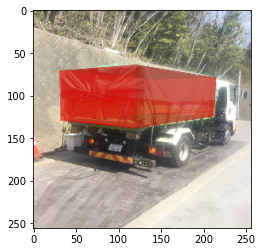

In [ ]:
plt.imshow(image.permute(1, 2, 0))

In [ ]:
keypoints

tensor([[ 30,  72],
        [120,  64],
        [214,  80],
        [140,  82],
        [ 31, 130],
        [120, 138],
        [213, 125],
        [139, 120]])